# About Dataset

## YouTube Video Engagement and Metrics Dataset

This dataset contains detailed engagement metrics for YouTube videos over time. The data includes views, likes, comments, shares, and other key metrics for individual videos, allowing for analysis of video performance and audience interaction.

### Columns:

- **video_id**: The unique identifier for each YouTube video.
- **day**: The date of the video engagement data (format: YYYY-MM-DD).
- **views**: The total number of views the video received on that day.
- **redViews**: The number of red views (e.g., views where users interacted with specific content).
- **comments**: The number of comments made on the video.
- **likes**: The number of likes received on the video.
- **dislikes**: The number of dislikes received on the video.
- **videosAddedToPlaylists**: The number of times the video was added to playlists.
- **videosRemovedFromPlaylists**: The number of times the video was removed from playlists.
- **shares**: The number of times the video was shared.
- **estimatedMinutesWatched**: The total estimated minutes of the video watched.
- **estimatedRedMinutesWatched**: The total estimated red minutes watched (similar to views but involving specific content interactions).
- **averageViewDuration**: The average duration of views for the video (in seconds).
- **averageViewPercentage**: The average percentage of the video watched.
- **annotationClickThroughRate**: The click-through rate for video annotations.
- **annotationCloseRate**: The close rate for video annotations.
- **annotationImpressions**: The number of times an annotation was shown to viewers.
- **annotationClickableImpressions**: The number of times a clickable annotation was shown.
- **annotationClosableImpressions**: The number of times a closable annotation was shown.
- **annotationClicks**: The number of clicks on the annotations.
- **annotationCloses**: The number of times the annotation was closed.
- **cardClickRate**: The click-through rate for cards in the video.
- **cardTeaserClickRate**: The click-through rate for teaser cards.
- **cardImpressions**: The number of times a card was shown in the video.
- **cardTeaserImpressions**: The number of times a teaser card was shown in the video.
- **cardClicks**: The number of times a card was clicked.
- **cardTeaserClicks**: The number of times a teaser card was clicked.
- **subscribersGained**: The number of subscribers gained on the day due to the video.
- **subscribersLost**: The number of subscribers lost on the day due to the video.


In [2]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,RobustScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('/kaggle/input/200k-youtube-channel-analytics/all_youtube_analytics.csv')
data

,video_id,day,views,redViews,comments,likes,dislikes,videosAddedToPlaylists,videosRemovedFromPlaylists,shares,...,annotationClicks,annotationCloses,cardClickRate,cardTeaserClickRate,cardImpressions,cardTeaserImpressions,cardClicks,cardTeaserClicks,subscribersGained,subscribersLost
0,YuQaT52VEwo,2019-09-06,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,YuQaT52VEwo,2019-09-07,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SfTEVOQP-Hk,2019-09-07,6.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,YuQaT52VEwo,2019-09-08,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SfTEVOQP-Hk,2019-09-08,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234884,jCBMPRa88_4,2024-11-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234885,bN7jBc95XDo,2024-11-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234886,ZwtHeB7L6lA,2024-11-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234887,5DM_c9zMn0U,2024-11-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.select_dtypes(np.number).columns

Index(['views', 'redViews', 'comments', 'likes', 'dislikes',
       'videosAddedToPlaylists', 'videosRemovedFromPlaylists', 'shares',
       'estimatedMinutesWatched', 'estimatedRedMinutesWatched',
       'averageViewDuration', 'averageViewPercentage',
       'annotationClickThroughRate', 'annotationCloseRate',
       'annotationImpressions', 'annotationClickableImpressions',
       'annotationClosableImpressions', 'annotationClicks', 'annotationCloses',
       'cardClickRate', 'cardTeaserClickRate', 'cardImpressions',
       'cardTeaserImpressions', 'cardClicks', 'cardTeaserClicks',
       'subscribersGained', 'subscribersLost'],
      dtype='object')

In [5]:
data.select_dtypes(object).columns

Index(['video_id', 'day'], dtype='object')

# descriptive analysis

In [6]:
cat_cols=['video_id', 'day']
data[cat_cols].describe().T

,count,unique,top,freq
video_id,234889,211,YuQaT52VEwo,1893
day,234889,1893,2024-11-10,211


In [7]:
num_cols=['views', 'redViews', 'comments', 'likes', 'dislikes',
       'videosAddedToPlaylists', 'videosRemovedFromPlaylists', 'shares',
       'estimatedMinutesWatched', 'estimatedRedMinutesWatched',
       'averageViewDuration', 'averageViewPercentage',
       'annotationClickThroughRate', 'annotationCloseRate',
       'annotationImpressions', 'annotationClickableImpressions',
       'annotationClosableImpressions', 'annotationClicks', 'annotationCloses',
       'cardClickRate', 'cardTeaserClickRate', 'cardImpressions',
       'cardTeaserImpressions', 'cardClicks', 'cardTeaserClicks',
       'subscribersGained', 'subscribersLost']
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
views,234889.0,88.842121,331.280375,0.0,1.00,8.00,35.00,8818.00
redViews,234889.0,18.717326,78.293400,0.0,0.00,2.00,8.00,2658.00
comments,234889.0,0.039419,0.355816,0.0,0.00,0.00,0.00,24.00
likes,234889.0,0.969816,3.984013,-11.0,0.00,0.00,0.00,206.00
dislikes,234889.0,0.032215,0.241694,-19.0,0.00,0.00,0.00,11.00
videosAddedToPlaylists,234889.0,1.262835,7.535244,0.0,0.00,0.00,1.00,2678.00
videosRemovedFromPlaylists,234889.0,0.228908,5.702640,0.0,0.00,0.00,0.00,2647.00
shares,234889.0,0.337198,1.552007,0.0,0.00,0.00,0.00,251.00
estimatedMinutesWatched,234889.0,3466.270749,12548.191609,0.0,2.00,168.00,1047.00,285103.00
estimatedRedMinutesWatched,234889.0,690.027341,2721.536527,0.0,0.00,25.00,234.00,78470.00


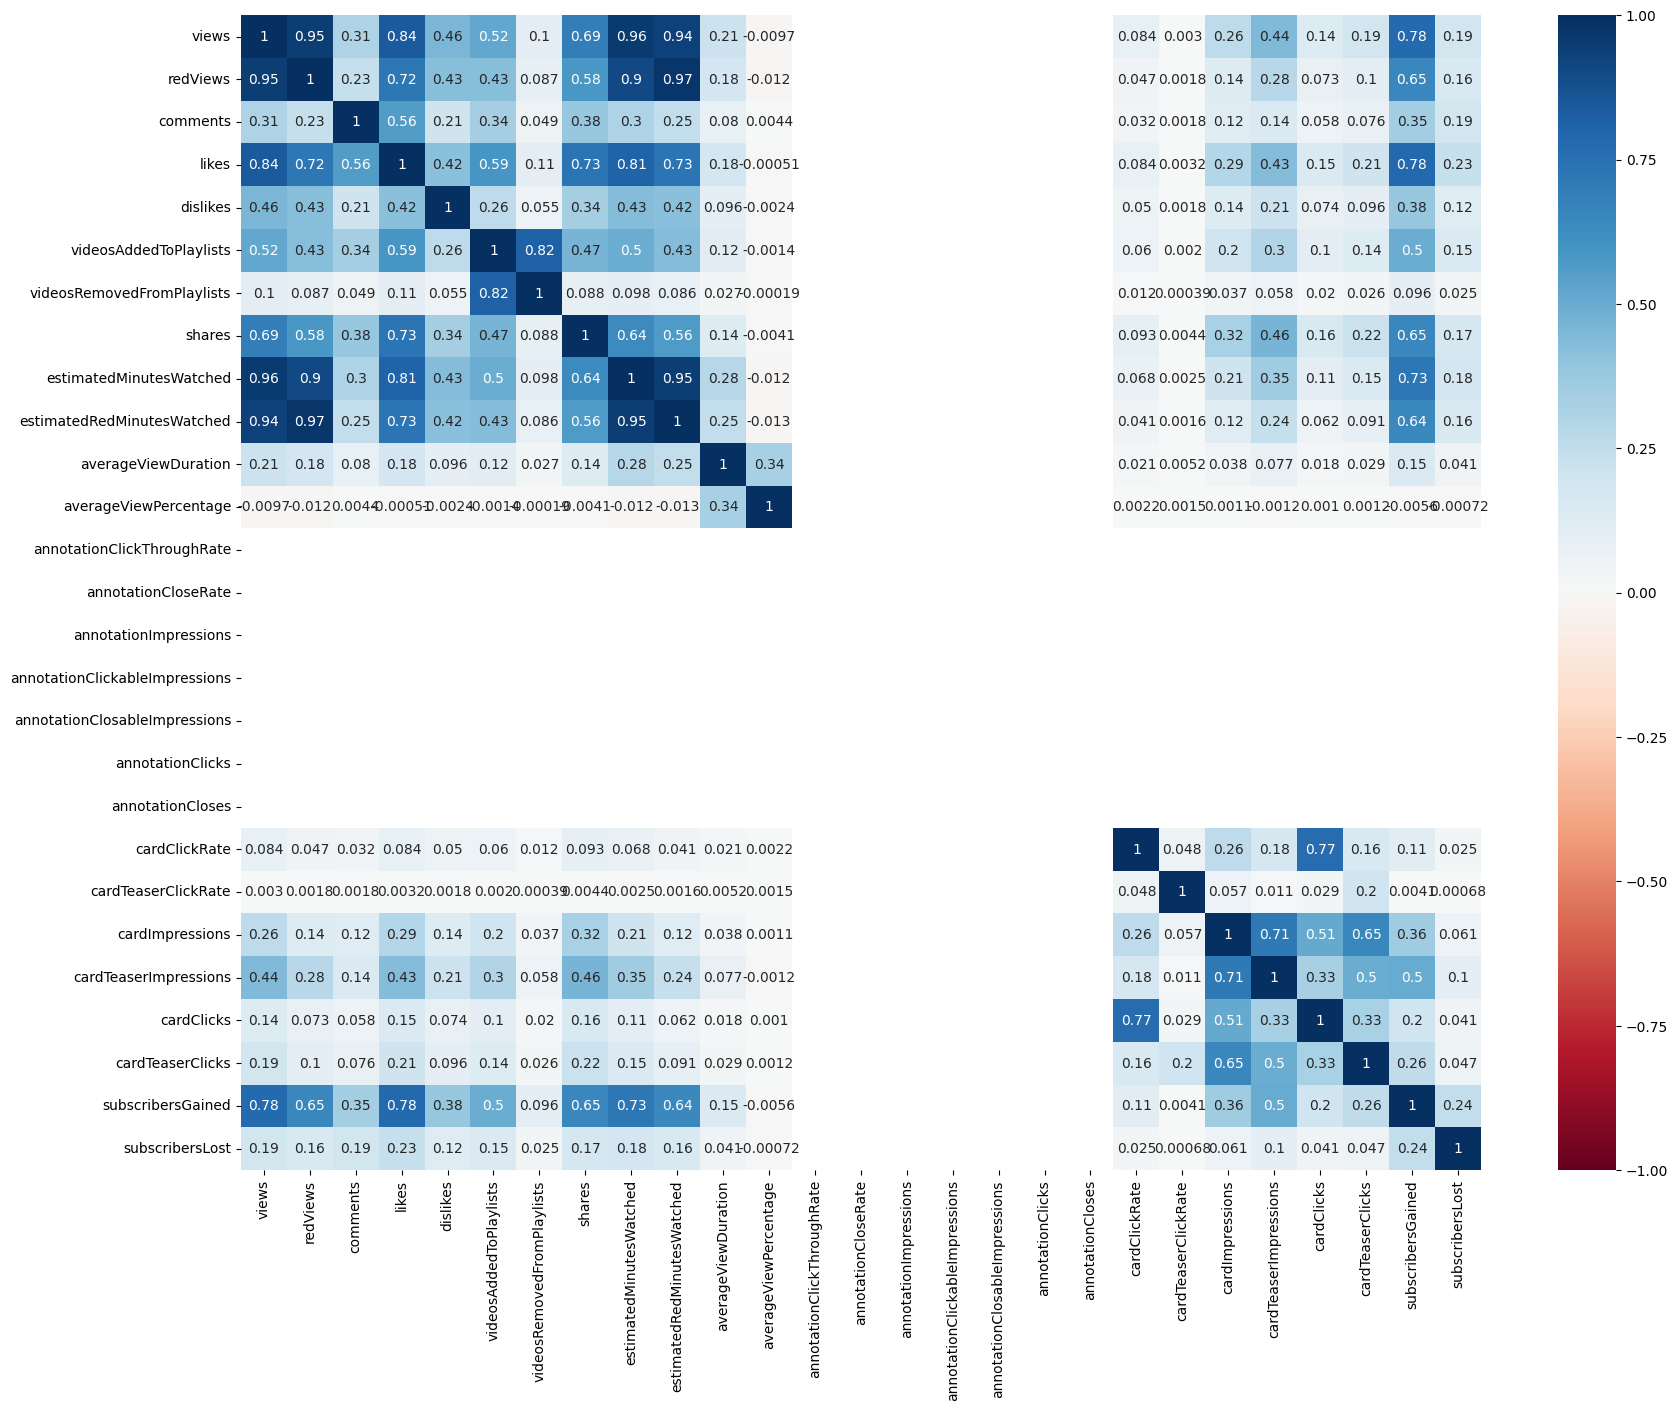

In [8]:
plt.figure(figsize=(20,15))
sns.heatmap(data=data[num_cols].corr(),vmin=-1,vmax=1,cmap='RdBu',annot=True)
plt.show()

# Univariate Analysis

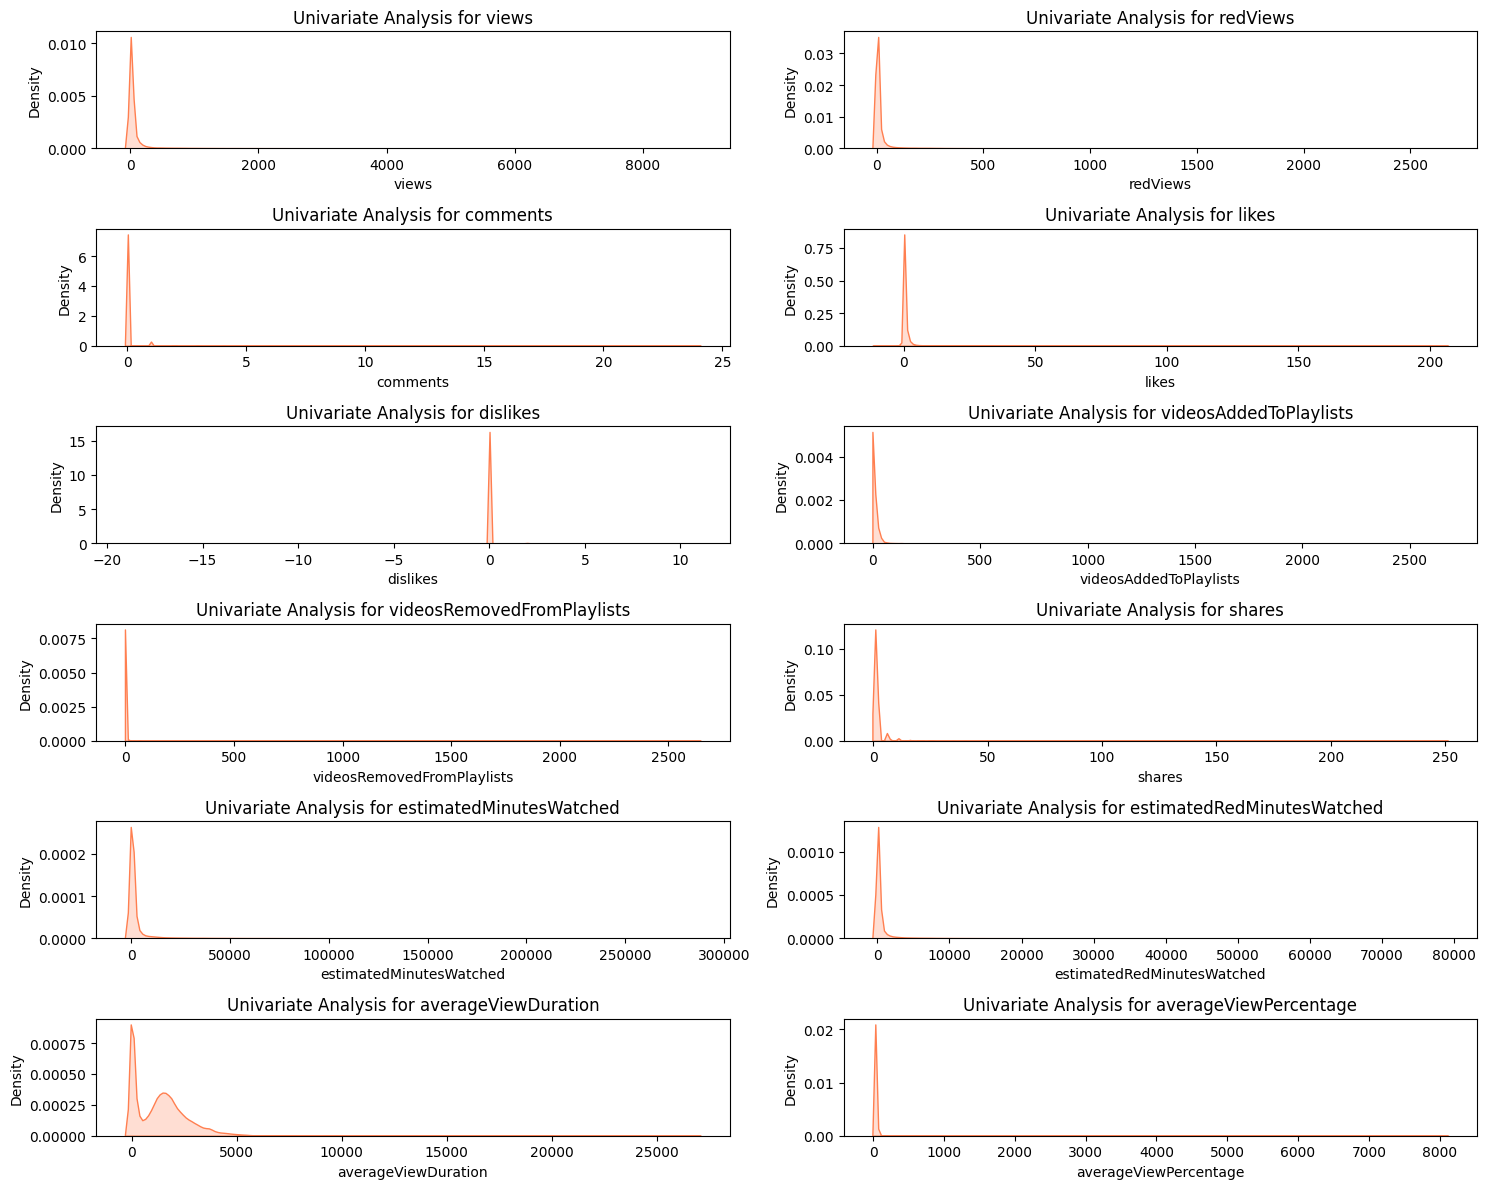

In [9]:
num_cols = ['views', 'redViews', 'comments', 'likes', 'dislikes',
             'videosAddedToPlaylists', 'videosRemovedFromPlaylists', 'shares',
             'estimatedMinutesWatched', 'estimatedRedMinutesWatched',
             'averageViewDuration', 'averageViewPercentage']

t = 1
rows = 6
cols = 2

plt.figure(figsize=(15, 12))  # Set figure size for better clarity

for i in num_cols:
    plt.subplot(rows, cols, t)  # Define subplot grid and position
    sns.kdeplot(data=data, x=i, fill=True, color='coral')  # Plot KDE for each column
    plt.title(f'Univariate Analysis for {i}')
    t += 1

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots

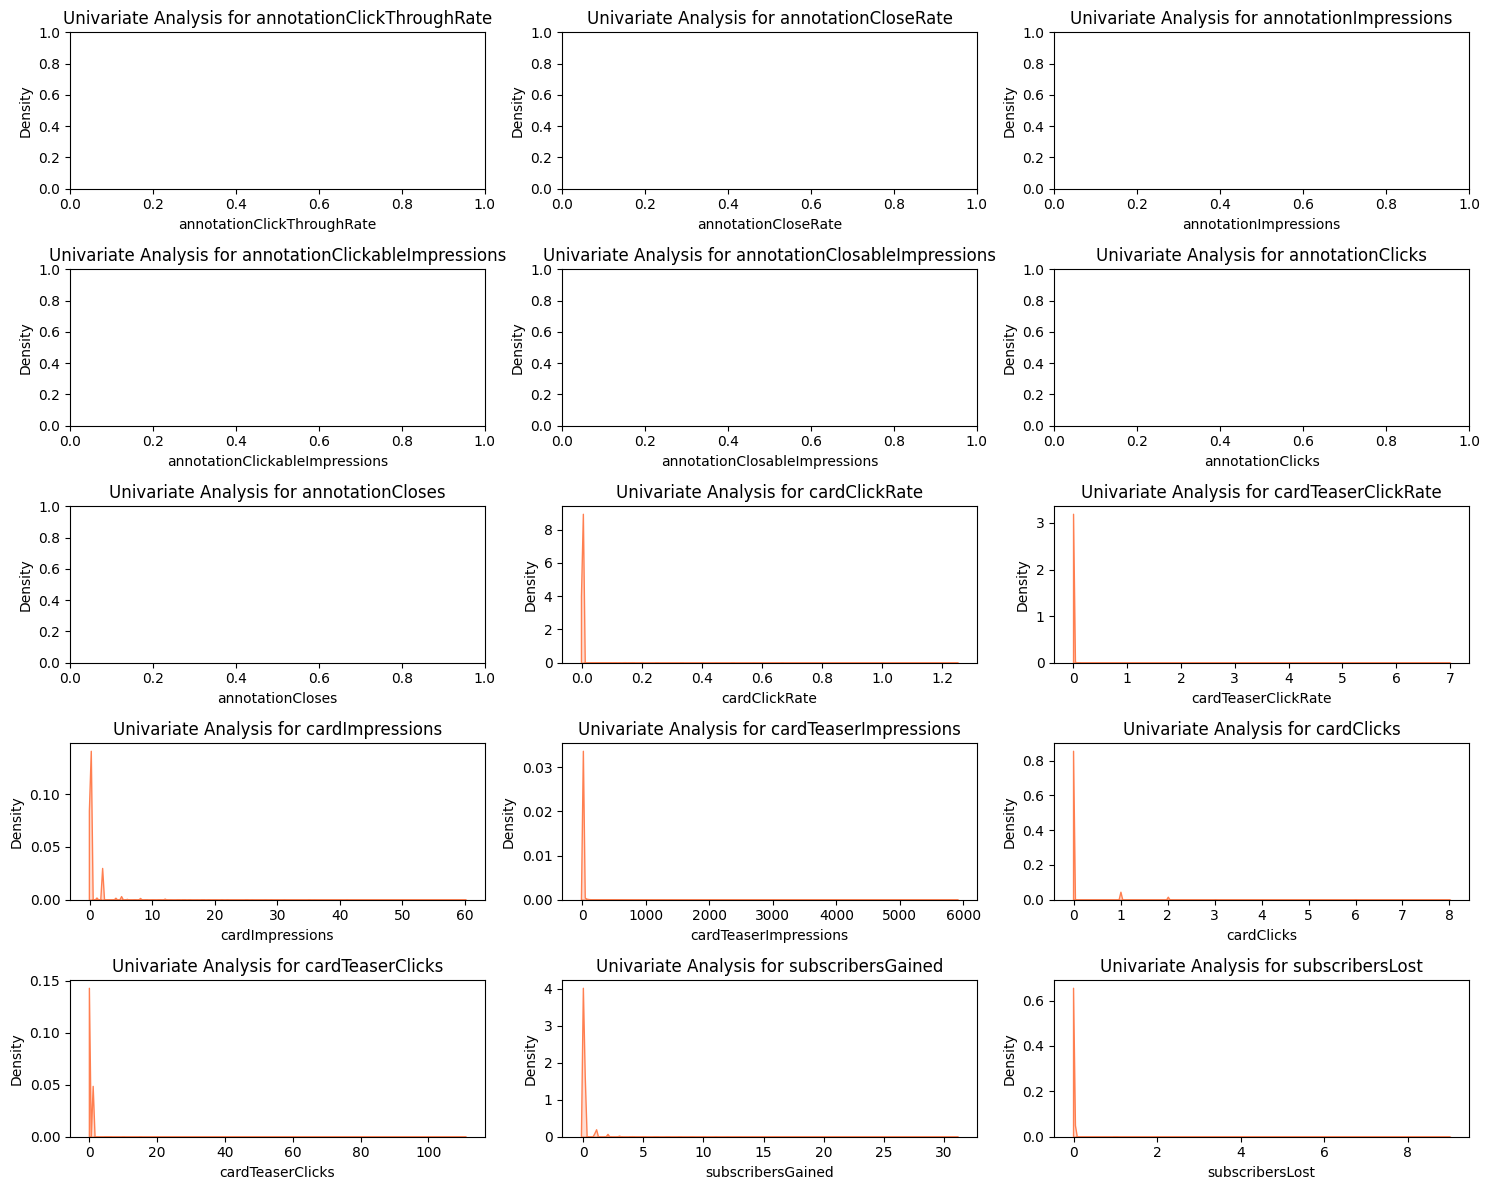

In [10]:
num_cols=['annotationClickThroughRate', 'annotationCloseRate',
       'annotationImpressions', 'annotationClickableImpressions',
       'annotationClosableImpressions', 'annotationClicks', 'annotationCloses',
       'cardClickRate', 'cardTeaserClickRate', 'cardImpressions',
       'cardTeaserImpressions', 'cardClicks', 'cardTeaserClicks',
       'subscribersGained', 'subscribersLost']

t = 1
rows = 5
cols = 3

plt.figure(figsize=(15, 12))  # Set figure size for better clarity

for i in num_cols:
    plt.subplot(rows, cols, t)  # Define subplot grid and position
    sns.kdeplot(data=data, x=i, fill=True, color='coral')  # Plot KDE for each column
    plt.title(f'Univariate Analysis for {i}')
    t += 1

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots

## Bivariate Anslysis

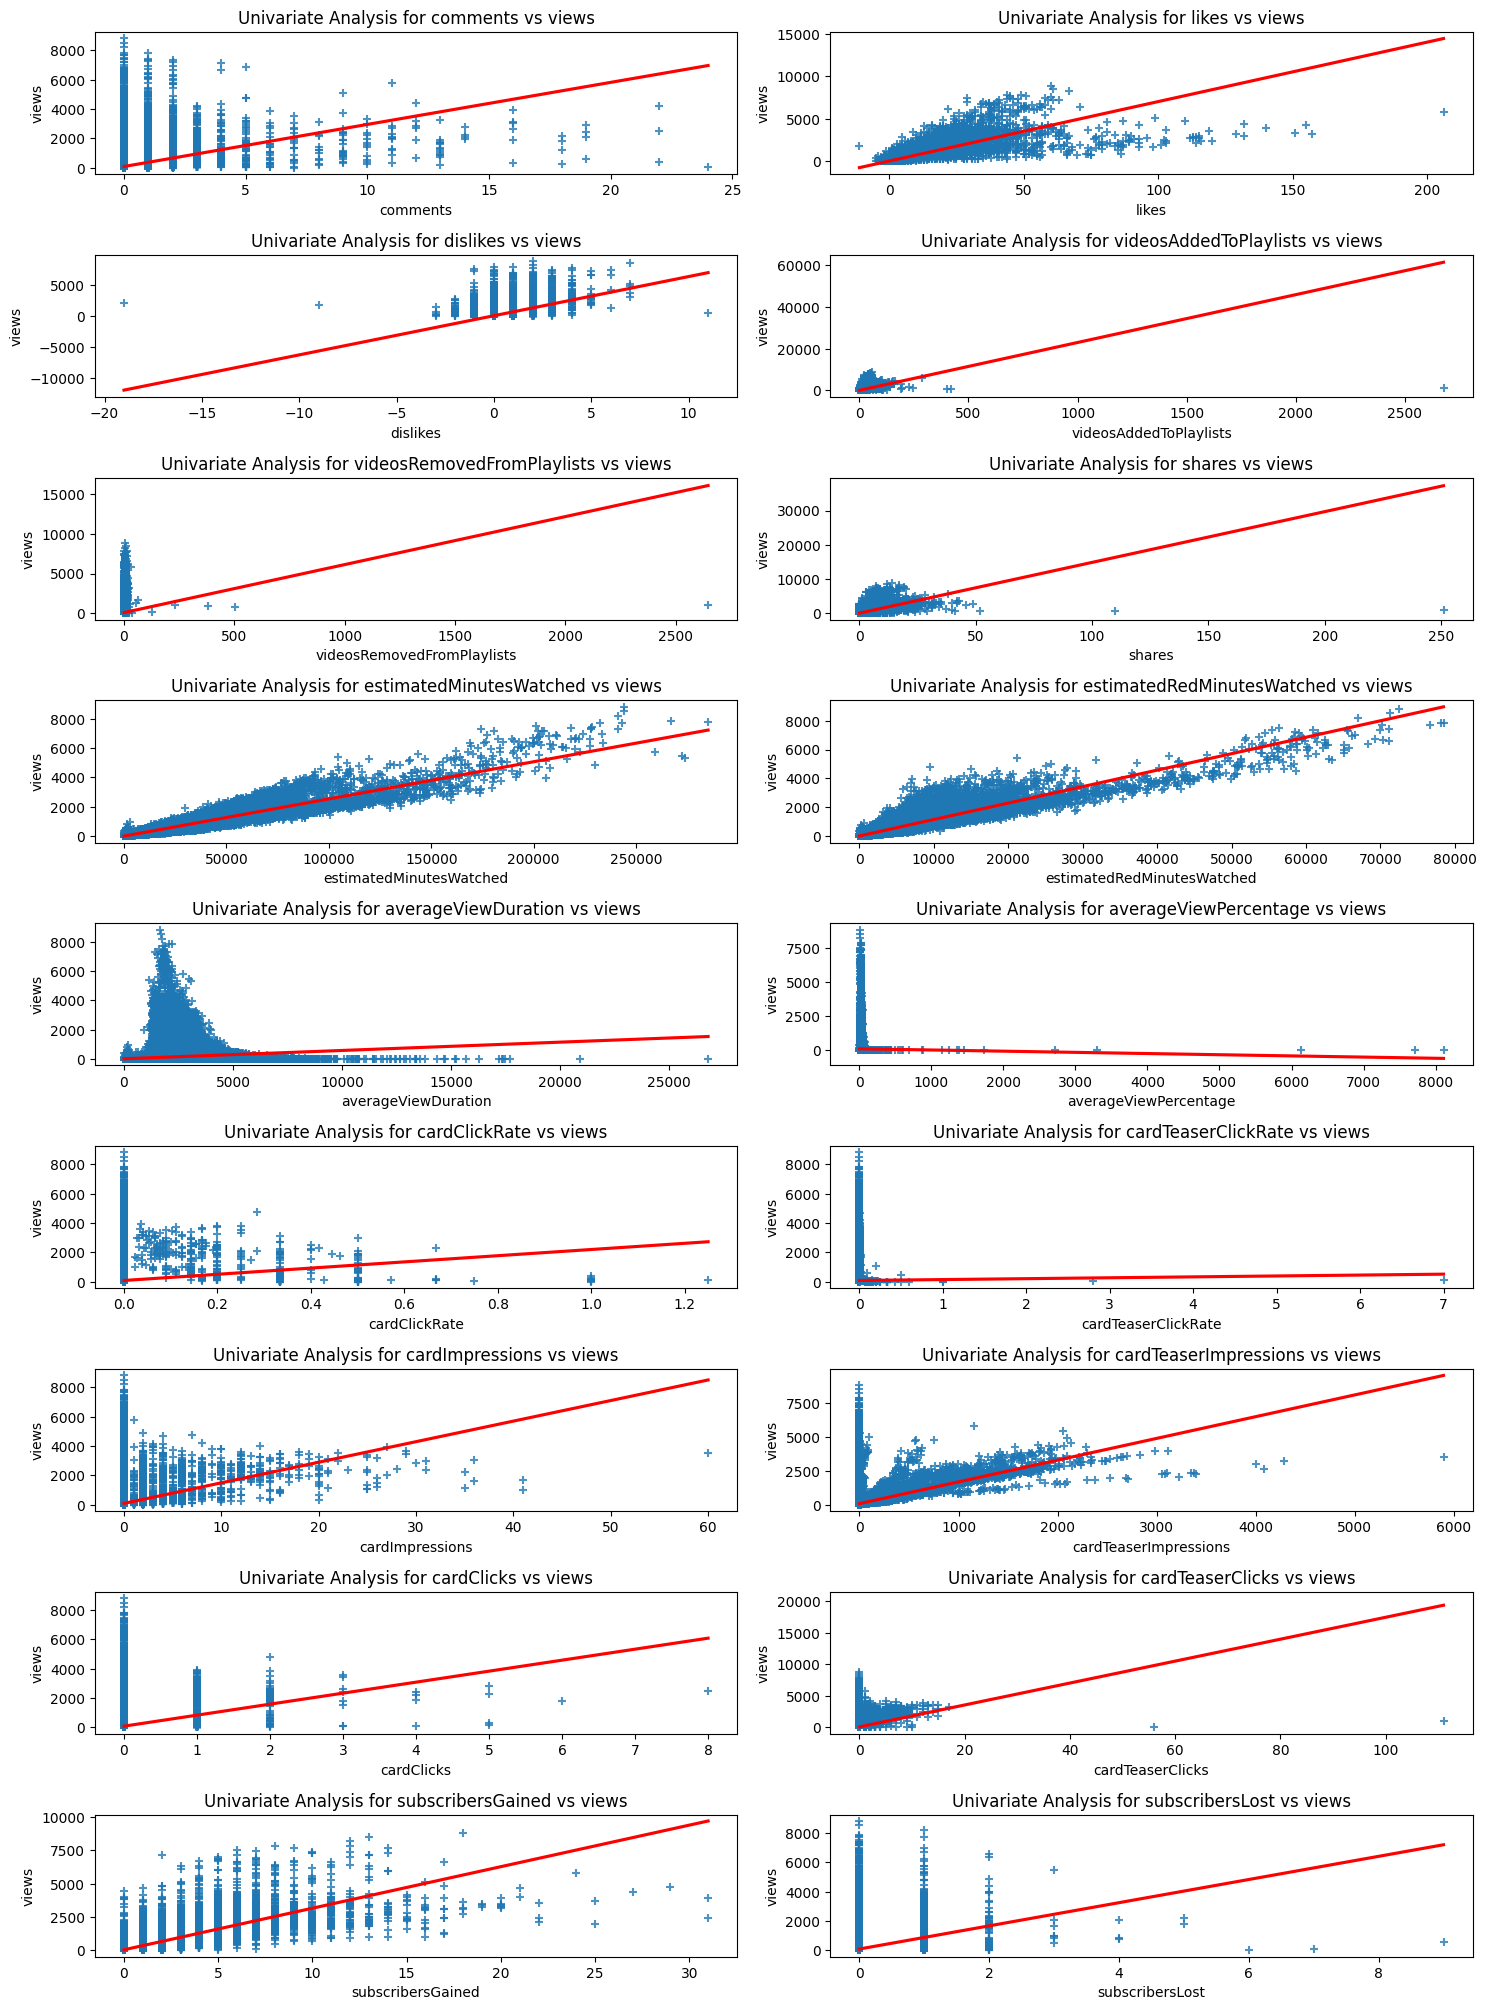

In [14]:
num_cols=['comments', 'likes', 'dislikes',
       'videosAddedToPlaylists', 'videosRemovedFromPlaylists', 'shares',
       'estimatedMinutesWatched', 'estimatedRedMinutesWatched',
       'averageViewDuration', 'averageViewPercentage',
       'cardClickRate', 'cardTeaserClickRate', 'cardImpressions',
       'cardTeaserImpressions', 'cardClicks', 'cardTeaserClicks',
       'subscribersGained', 'subscribersLost']

t = 1
rows = 10
cols = 2

plt.figure(figsize=(15, 22))  # Set figure size for better clarity

for i in num_cols:
    plt.subplot(rows, cols, t)  # Define subplot grid and position
    sns.regplot(data=data, x=i, y='views', marker='+', ci=0, \
                line_kws={'color':'red'})  
    # Plot scatter plot for each column vs views
    plt.title(f'Univariate Analysis for {i} vs views')
    t += 1

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots